## By-Hand of the Gradient-descent Method. Simple Case    

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd 
from scipy.optimize import leastsq, curve_fit
from scipy import linalg as la
from IPython.display import display, Math, Latex
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 100
eps = np.random.normal(0,13,N)
x = np.linspace(0, 50, N)
y = 12 + (3.6*x) + eps
true = 12 + (3.6*x) 

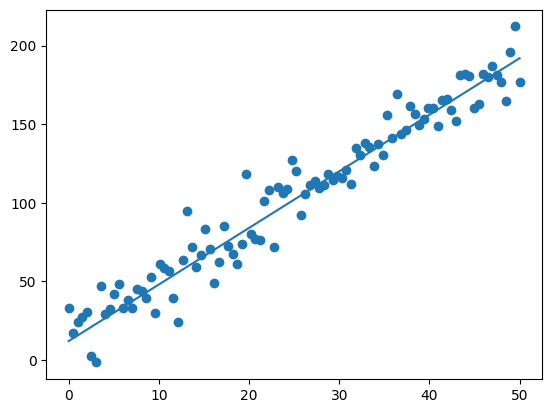

<IPython.core.display.Math object>

In [3]:
plt.scatter(x, y)
plt.plot(x, true)
plt.show()
display(Math('f(x) = \alpha + \beta*x + epsilon'))

lets assume we only want too find the optimal intercept for the fitted line (beta is know) 

In [4]:
dy_da = lambda x, y, a: sum(-2 * (y - (a + (3.6*x)))) #derivative of the original costfunction, with known Slope  

def gradient_descent0(t0,learnrate = 0.01, tol = 0.001, maxiter = 1000):
    ss = []
    slopes = []
    thetas = [t0]
    
    slope = dy_da(x, y, t0)
    stepsize = learnrate * slope
    t= t0 - (stepsize)
    
    ss.append(abs(stepsize))
    slopes.append(slope)
    thetas.append(t0)
    iters = 1
    
    while abs(stepsize) >= tol and iters <= maxiter:
        slope = dy_da(x, y, t)
        stepsize = learnrate * slope
        t = t - stepsize
        
        ss.append(abs(stepsize))
        slopes.append(slope)
        thetas.append(t)
        iters += 1
        
    return ss, slopes, thetas, iters 

ss, slopes, thetas, iters = gradient_descent0(0,learnrate = 0.0005, tol = 0.01) #Note: very sensitive to the learningrate 

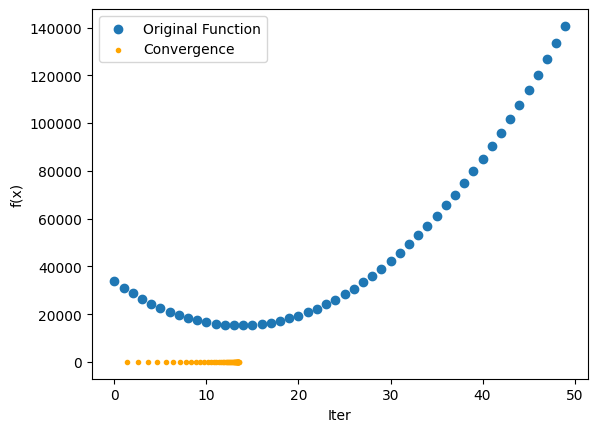

In [6]:
costfunc = lambda x, y, a: sum((y - (a + 3.6*x))**2)
costs = [costfunc(x,y, alpha) for alpha in np.arange(0,50,1)]
steps = np.cumsum(ss)
plt.scatter(np.arange(0,50,1), costs, label = "Original Function")
plt.scatter(steps, np.zeros(len(steps)), color = "orange", marker='.', label = "Convergence")
plt.xlabel("Iter")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Estimating two parameters $\alpha$ and $\beta_1$

In [7]:
dy_da = lambda x, y, a, b: sum(-2 * (y - (a + (b*x)))) # partial derivative with respect to a 
dy_db = lambda x, y, a, b: sum(-2 * x * (y - (a + (b*x)))) # partial derivative with respect to b


def gradient_descent(t0:np.array,learnrate = 0.01, tol = 0.001, maxiter = 1000):
    ss = []
    gradients = []
    thetas = [t0]
    
    gradient = np.array([dy_da(x, y, *t0), dy_db(x,y,*t0)])
    #print(gradient)
    stepsize = learnrate * gradient
    t = t0 - (stepsize)
    
    ss.append(la.norm(stepsize))
    gradients.append(gradient)
    thetas.append(t0)
    iters = 1
    
    while la.norm(stepsize) >= tol and iters <= maxiter:
        gradient = np.array([dy_da(x, y, *t), dy_db(x,y,*t)])
        stepsize = learnrate * gradient
        t = t - stepsize
        
        ss.append(la.norm(stepsize))
        gradients.append(gradient)
        thetas.append(t)
        iters += 1
        
    return ss, slopes, thetas, iters 

ss, slopes, thetas, iters = gradient_descent([9,2.6],learnrate = 0.00001, tol = 0.01, maxiter = 1000)

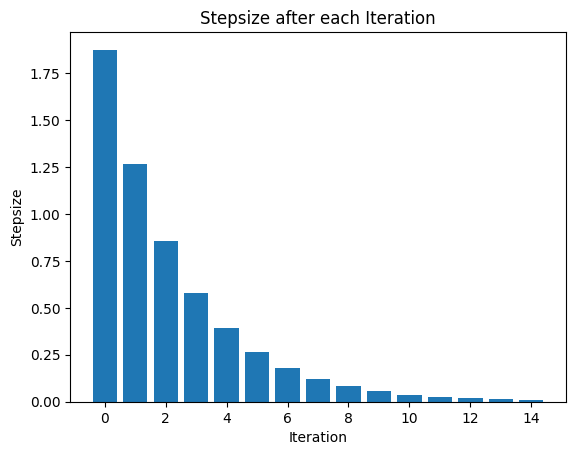

In [8]:
plt.bar(range(len(ss)),ss)
plt.xlabel("Iteration")
plt.ylabel("Stepsize")
plt.title("Stepsize after each Iteration")
plt.show()

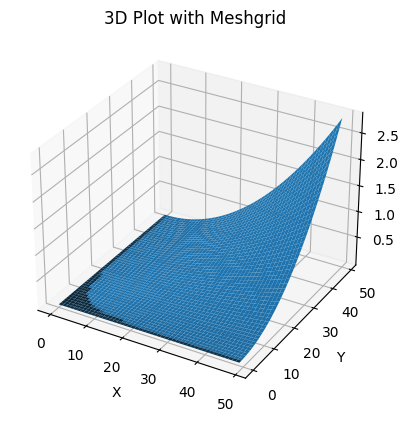

In [165]:
x = np.arange(0,50,1)
y = np.arange(0,50,1)
X, Y = np.meshgrid(x, y)
#costs = [costfunc(x,y, alpha) for alpha in np.arange(0,50,1)]
costfunc1 = lambda x, y, a, b: sum((y - (a + b*x))**2)

#review
def f(x, y):
    return (np.array([costfunc1(x, y, alpha, 0) for alpha in np.arange(0,50,1)]) +
            np.array([costfunc1(x,y, 0,beta) for beta in np.arange(0,50,1)]))
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot with Meshgrid')

plt.show()
